# Time for the showcase showdown!
Can we use bayesians statistics to help win the showcase showdown? In other words, can we use it for something other than the Monty Hall problem? Let's find out!

In [1]:
from __future__ import print_function, division

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import numpy as np

import sys
import os

tb_dir = "/home/pi/Programming/ThinkBayes2/"

sys.path.append(os.path.abspath(tb_dir + "thinkbayes2/"))
sys.path.append(os.path.abspath(tb_dir + "scripts/"))
sys.path.append(os.path.abspath(tb_dir + "thinkplot/"))

#from thinkbayes2 import Pmf, Cdf, Suite, Beta
import thinkbayes2
import thinkplot
import price

Using the price.py set of classes and methods, we can create some players and feed them the prices of the showcase showdowns of 2011 & 2012, as well as what people had bid for each one. Player 1 represents showcase 1, Player 2 represent showcase 2. 

(I altered the MakePlayers code to be able to pass in a directory where the data files are).

In [2]:
data_dir = tb_dir + "data/"
player1, player2 = price.MakePlayers(data_dir)

Now we can get a look at the distribution of the actual prices of the showcases using methods from the player class. To make these plots smooth and less jagged, underneath the class is using Kernel Density estimation that helps us find a Probability Density Function that best fits our data. Leaving us with one silky smooth graph.

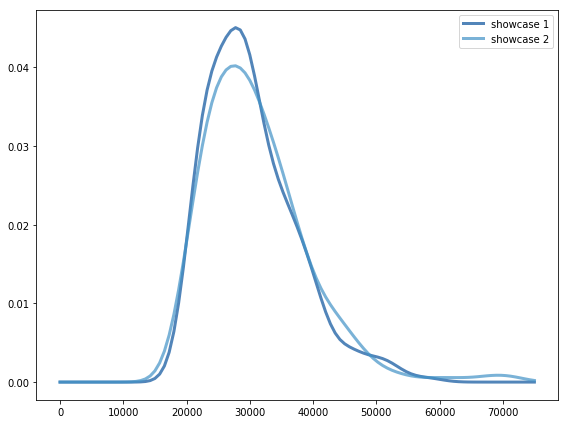

In [3]:
thinkplot.Clf()
thinkplot.PrePlot(num=2)
pmf1 = player1.PmfPrice()
pmf1.label = 'showcase 1'
pmf2 = player2.PmfPrice()
pmf2.label = 'showcase 2'
thinkplot.Pdfs([pmf1, pmf2])
thinkplot.decorate(legend=True)

Continuing the parse through this data, we can generate a Cumulative Distribution Function (CDF) that tells us more information about the bids for each player, specifically the difference, which is defined as price - bid. For instance, we can find out the median of this difference, thusly:

In [4]:
cdf1 = player1.CdfDiff()
cdf1.label = 'player 1'
cdf2 = player2.CdfDiff()
cdf2.label = 'player 2'

print('Player median', cdf1.Percentile(50))
print('Player median', cdf2.Percentile(50))

Player median 3902
Player median 3136


We can also determine how often a player for each showcase overbid. This is low since the object of the game is to get closest without going over, so there is an obvious bias to underbidding.

In [5]:
print('Player 1 overbids', player1.ProbOverbid())
print('Player 2 overbids', player2.ProbOverbid())


Player 1 overbids 0.24600638977635783
Player 2 overbids 0.29073482428115016


This bias can be clearly seen in the total CDF graph.

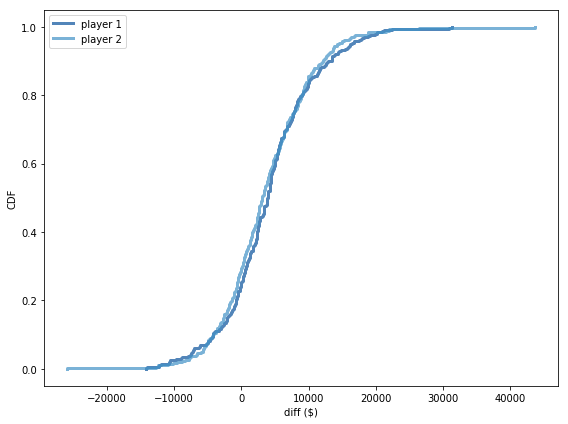

In [6]:
thinkplot.Clf()
thinkplot.PrePlot(num=2)
thinkplot.Cdfs([cdf1, cdf2])
thinkplot.decorate(xlabel='diff ($)',
            ylabel='CDF')


So our prior on what the price of the showcase is can be determined by the previous prices from the data. What happens then when we make a guess, say of 20,000, which is one the low end of the price distribution function that we created? As before, the posterior gets updated through the likelihood function across each hypothesis and it all gets renormalized. So a previous most likely value of around 27,000 is now closer to 25,000. This then leads to the idea that if you think the price is 20,000 then you should believe the value is actulally 24,000 (we still want to make sure we underbid).

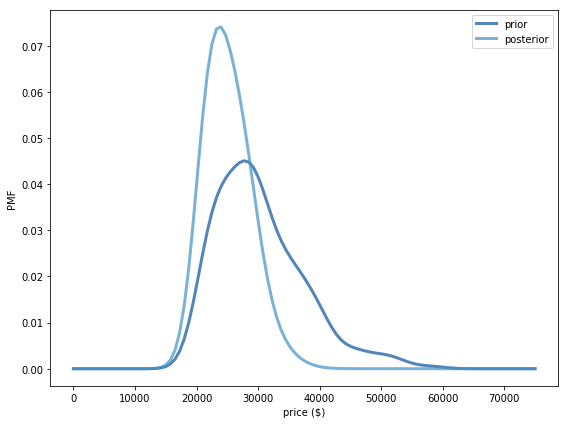

In [7]:
player1.MakeBeliefs(20000)
player1.PlotBeliefs()

So what now is the optimal bid for each player? We can run through multiple bids and determine the expected gain for each bid. To do this, we create 2 players as before and have them make a best guess. 

In [8]:
player1, player2 = price.MakePlayers(data_dir)

player1.MakeBeliefs(20000)
player2.MakeBeliefs(40000)

calc1 = price.GainCalculator(player1, player2)
calc2 = price.GainCalculator(player2, player1)

By going through the expected gains, we can then determine what is the optimal bid. For player 1 its 21,000 (higher than best guess) and for player 2 its 31,500 (lower than best guess). And the gain means ... I don't know, this part lost me.

Player 1 optimal bid (16668.781463564384, 21000.0)
Player 2 optimal bid (19365.95359088568, 31500.0)


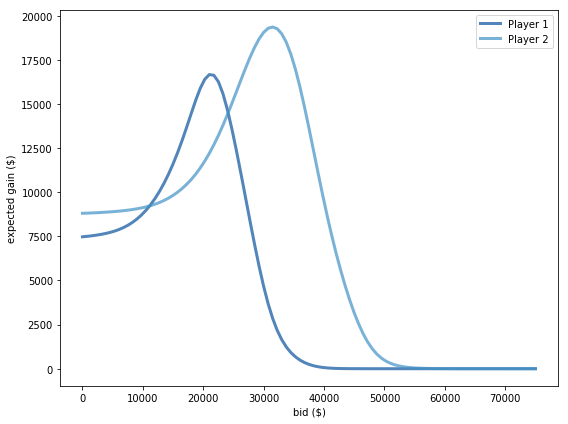

In [9]:
thinkplot.Clf()
thinkplot.PrePlot(num=2)

bids, gains = calc1.ExpectedGains()
thinkplot.Plot(bids, gains, label='Player 1')
print('Player 1 optimal bid', max(zip(gains, bids)))

bids, gains = calc2.ExpectedGains()
thinkplot.Plot(bids, gains, label='Player 2')
print('Player 2 optimal bid', max(zip(gains, bids)))

thinkplot.decorate(xlabel='bid ($)',
                ylabel='expected gain ($)')